# 1. Import and Install Dependencies

In [95]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

^C


In [15]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [16]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [17]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [18]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [19]:
def draw_styled_landmarks(image, results):

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 


In [20]:
# mp_drawing.draw_landmarks()

In [21]:
cap = cv2.VideoCapture(0)
HEIGHT = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # webcam video frame height
WIDTH = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # webcam video frame width
FPS = int(cap.get(cv2.CAP_PROP_FPS)) # webcam video fram rate 




# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [22]:
# draw_styled_landmarks(frame, results)

In [23]:
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [24]:
# results.pose_landmarks

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    return pose

In [26]:
# result_test = extract_keypoints(results)

In [27]:
# result_test.shape

# 4. Setup Folders for Collection

In [28]:
# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('MP_Data') 

# # Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])

# # Thirty videos worth of data
# no_sequences = 30

# # Videos are going to be 30 frames in length
# sequence_length = 30

# # Folder start
# start_folder = 30

In [30]:
actions = np.array(['pushup', 'squat', 'lunge', 'noactions'])
num_classes = len(actions)

In [136]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join(os. getcwd(),'data') 
print(DATA_PATH)

# make directory if it does not exist yet
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Actions/exercises that we try to detect
actions = np.array(['lunge'])
num_classes = len(actions)

# How many videos worth of data
no_sequences = 9

# Videos are going to be this many frames in length
sequence_length = 30

# Folder start
# Change this to collect more data and not lose previously collected data
start_folder = 112


C:\Users\theak\gym_pose_trainer\gym_pose_trainer\data


In [31]:
actions

array(['pushup', 'squat', 'lunge', 'noactions'], dtype='<U9')

In [138]:
# main_folder = 'noactions'
# os.makedirs(main_folder, exist_ok=True)

# # Create subfolders ranging from 101 to 150
# for folder_num in range(101, 151):
#     folder_name = os.path.join(main_folder, str(folder_num))
#     os.makedirs(folder_name, exist_ok=True)

# print(f"Folders created successfully in '{main_folder}'.")

In [139]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

# 5. Collect Keypoint Values for Training and Testing

In [140]:
# # Colors associated with each exercise (e.g., curls are denoted by blue, squats are denoted by orange, etc.)
# colors = [(245,117,16), (117,245,16), (16,117,245)]

In [143]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
# cap.release()
# cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [34]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
# label_map

In [35]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
# labels

In [28]:
# # Make sure first dimensions of arrays match
# X = np.array(sequences)
# y = to_categorical(labels).astype(int)
# print(X.shape, y.shape)

In [29]:
# np.array(sequences).shape

In [30]:
# np.array(labels).shape

In [31]:
# X = np.array(sequences)

In [32]:
# X.shape

In [33]:
# y = to_categorical(labels).astype(int)

In [34]:
# Split into training, validation, and testing datasets


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
# print(X_train.shape, y_train.shape)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=15/90, random_state=2)
# print(X_train.shape, X_test.shape,X_val.shape)

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [36]:
# y_test.shape

# 7. Build and Train LSTM Neural Network

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import (LSTM, Dense, Concatenate, Attention, Dropout, Softmax,
                                     Input, Flatten, Activation, Bidirectional, Permute, multiply, 
                                     ConvLSTM2D, MaxPooling3D, TimeDistributed, Conv2D, MaxPooling2D)

from scipy import stats

# disable some of the tf/keras training warnings 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"
tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(1)

# suppress untraced functions warning
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [38]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

In [39]:
# Callbacks to be used during neural network training 
# es_callback = EarlyStopping(monitor='val_loss', min_delta=5e-4, patience=10, verbose=0, mode='min')
# lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=0, mode='min')
# chkpt_callback = ModelCheckpoint(filepath=DATA_PATH, monitor='val_loss', verbose=0, save_best_only=True, 
#                                  save_weights_only=False, mode='min', save_freq=1)

# # Optimizer
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# # some hyperparamters
# batch_size = 32
# max_epochs = 500

In [40]:
# Set up Tensorboard logging and callbacks
# NAME = f"ExerciseRecognition-LSTM-{int(time.time())}"
# log_dir = os.path.join(os.getcwd(), 'logs', NAME,'')
# tb_callback = TensorBoard(log_dir=log_dir)

# callbacks = [tb_callback, es_callback, lr_callback, chkpt_callback]

In [41]:
# lstm = Sequential()
# lstm.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, 132)))
# lstm.add(LSTM(128, return_sequences=True, activation='relu'))
# lstm.add(LSTM(64, return_sequences=False, activation='relu'))
# lstm.add(Dense(64, activation='relu'))
# lstm.add(Dense(32, activation='relu'))
# lstm.add(Dense(actions.shape[0], activation='softmax'))
# print(lstm.summary())

In [42]:
# lstm.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# lstm.fit(X_train, y_train, batch_size=batch_size, epochs=max_epochs, validation_data=(X_val, y_val))

In [43]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
# #trying nicholas
X = np.array(sequences)
y = to_categorical(labels).astype(int)


In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
actions

array(['pushup', 'squat', 'lunge', 'noactions'], dtype='<U9')

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Training for fold 1 ...
Epoch 1/20
8/8 [==============================] - 5s 126ms/step - loss: 1.3692 - categorical_accuracy: 0.3542 - val_loss: 1.2384 - val_categorical_accuracy: 0.3500
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 1.2074 - categorical_accuracy: 0.4917 - val_loss: 1.0962 - val_categorical_accuracy: 0.4333
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 1.0400 - categorical_accuracy: 0.6208 - val_loss: 5.3900 - val_categorical_accuracy: 0.6167
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 1.1970 - categorical_accuracy: 0.5542 - val_loss: 0.8047 - val_categorical_accuracy: 0.5833
Epoch 5/20
8/8 [==============================] - 0s 46ms/step - loss: 0.8211 - categorical_accuracy: 0.5958 - val_loss: 0.6203 - val_categorical_accuracy: 0.6333
Epoch 6/20
8/8 [==============================] - 0s 47ms/step - loss: 0.9283 - categorical_accuracy: 0.6875 - val_loss: 0.4781 - val_categorical_accuracy: 0.81

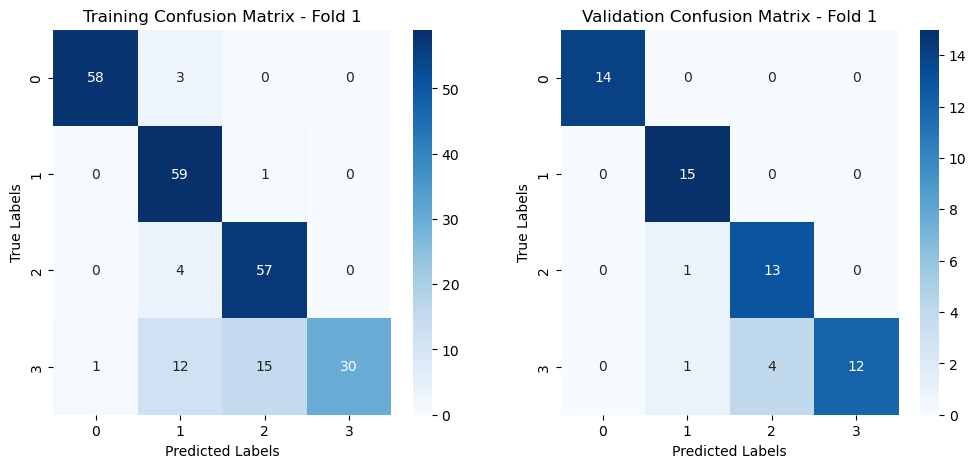

Training for fold 2 ...
Epoch 1/20
8/8 [==============================] - 5s 128ms/step - loss: 1.3600 - categorical_accuracy: 0.2667 - val_loss: 1.2942 - val_categorical_accuracy: 0.2667
Epoch 2/20
8/8 [==============================] - 0s 51ms/step - loss: 1.3169 - categorical_accuracy: 0.4500 - val_loss: 1.0808 - val_categorical_accuracy: 0.4667
Epoch 3/20
8/8 [==============================] - 0s 53ms/step - loss: 1.6680 - categorical_accuracy: 0.4292 - val_loss: 1.0657 - val_categorical_accuracy: 0.4500
Epoch 4/20
8/8 [==============================] - 0s 57ms/step - loss: 1.1833 - categorical_accuracy: 0.4833 - val_loss: 0.9613 - val_categorical_accuracy: 0.5667
Epoch 5/20
8/8 [==============================] - 0s 46ms/step - loss: 1.0390 - categorical_accuracy: 0.5167 - val_loss: 1.0237 - val_categorical_accuracy: 0.5333
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 1.3349 - categorical_accuracy: 0.4625 - val_loss: 2.0737 - val_categorical_accuracy: 0.41

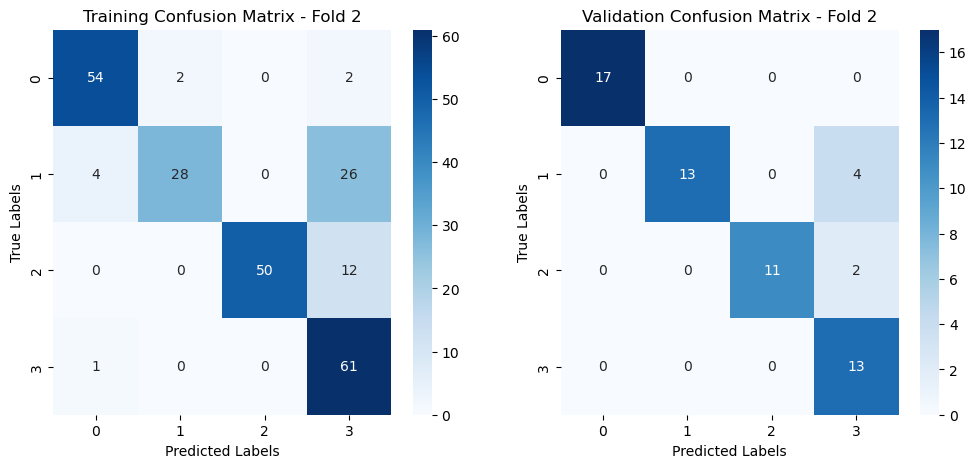

Training for fold 3 ...
Epoch 1/20
8/8 [==============================] - 5s 136ms/step - loss: 1.3175 - categorical_accuracy: 0.3083 - val_loss: 1.2361 - val_categorical_accuracy: 0.5667
Epoch 2/20
8/8 [==============================] - 0s 48ms/step - loss: 1.0045 - categorical_accuracy: 0.6875 - val_loss: 0.9519 - val_categorical_accuracy: 0.6167
Epoch 3/20
8/8 [==============================] - 0s 51ms/step - loss: 1.1012 - categorical_accuracy: 0.6833 - val_loss: 1.2056 - val_categorical_accuracy: 0.4833
Epoch 4/20
8/8 [==============================] - 0s 47ms/step - loss: 1.1200 - categorical_accuracy: 0.5750 - val_loss: 0.9460 - val_categorical_accuracy: 0.5833
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.6667 - categorical_accuracy: 0.7125 - val_loss: 0.4820 - val_categorical_accuracy: 0.9000
Epoch 6/20
8/8 [==============================] - 0s 47ms/step - loss: 13.9059 - categorical_accuracy: 0.7042 - val_loss: 1.6986 - val_categorical_accuracy: 0.4

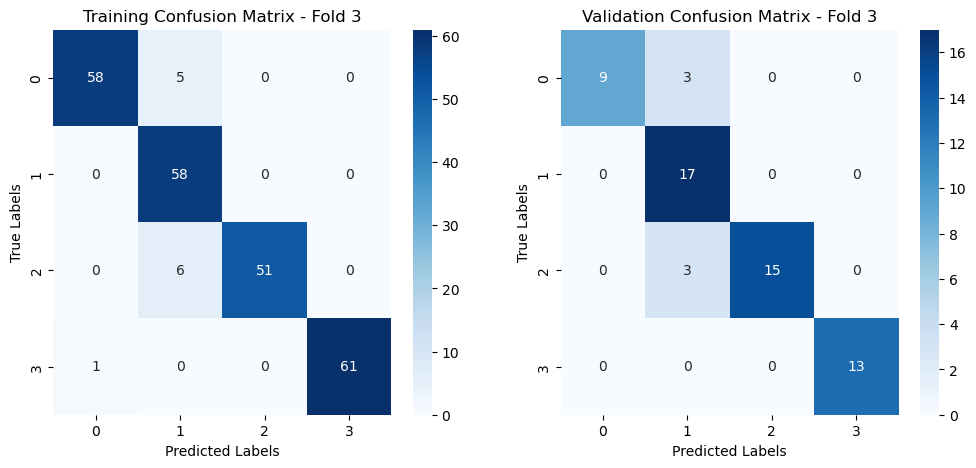

Training for fold 4 ...
Epoch 1/20
8/8 [==============================] - 5s 125ms/step - loss: 1.3741 - categorical_accuracy: 0.3458 - val_loss: 1.1620 - val_categorical_accuracy: 0.6333
Epoch 2/20
8/8 [==============================] - 0s 52ms/step - loss: 1.2247 - categorical_accuracy: 0.4417 - val_loss: 0.8871 - val_categorical_accuracy: 0.6667
Epoch 3/20
8/8 [==============================] - 0s 58ms/step - loss: 1.1209 - categorical_accuracy: 0.6708 - val_loss: 0.9594 - val_categorical_accuracy: 0.8500
Epoch 4/20
8/8 [==============================] - 0s 54ms/step - loss: 0.9219 - categorical_accuracy: 0.7042 - val_loss: 0.7155 - val_categorical_accuracy: 0.7500
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.7838 - categorical_accuracy: 0.7625 - val_loss: 0.6612 - val_categorical_accuracy: 0.8000
Epoch 6/20
8/8 [==============================] - 0s 53ms/step - loss: 1.2045 - categorical_accuracy: 0.8167 - val_loss: 0.9625 - val_categorical_accuracy: 0.71

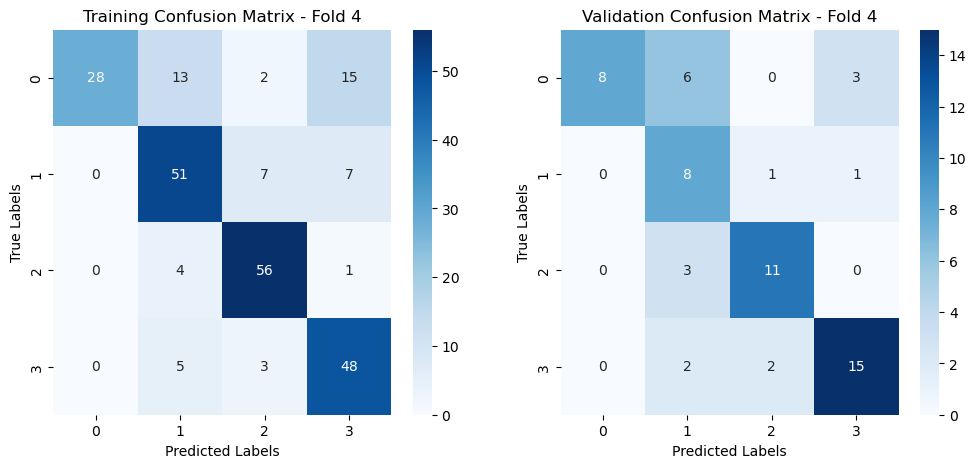

Training for fold 5 ...
Epoch 1/20
8/8 [==============================] - 5s 122ms/step - loss: 1.4127 - categorical_accuracy: 0.3000 - val_loss: 1.2705 - val_categorical_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 0s 48ms/step - loss: 1.2853 - categorical_accuracy: 0.4833 - val_loss: 1.1790 - val_categorical_accuracy: 0.3833
Epoch 3/20
8/8 [==============================] - 0s 47ms/step - loss: 1.0331 - categorical_accuracy: 0.5000 - val_loss: 0.8612 - val_categorical_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 0s 48ms/step - loss: 0.9266 - categorical_accuracy: 0.6625 - val_loss: 0.8084 - val_categorical_accuracy: 0.6500
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 1.0443 - categorical_accuracy: 0.6750 - val_loss: 0.6917 - val_categorical_accuracy: 0.7167
Epoch 6/20
8/8 [==============================] - 0s 49ms/step - loss: 0.6101 - categorical_accuracy: 0.8083 - val_loss: 0.6997 - val_categorical_accuracy: 0.73

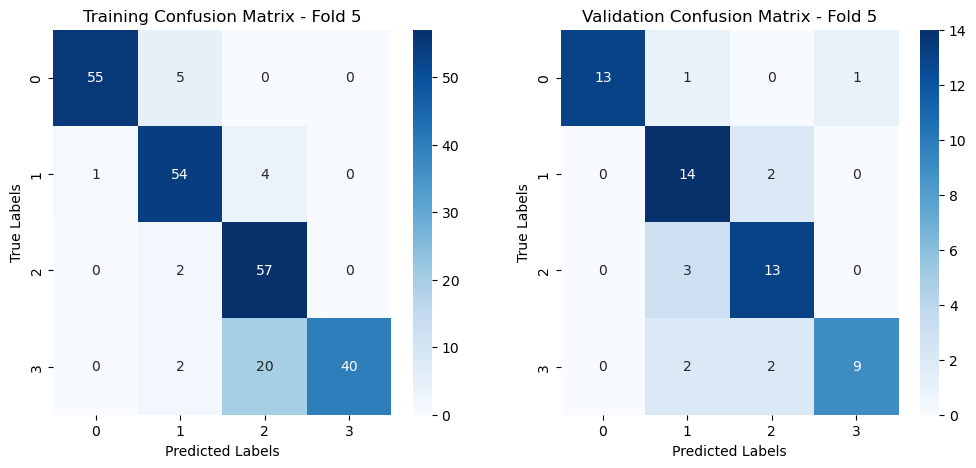

In [47]:
fold_no = 1
for train, test in kfold.split(X, y):
    # Define the LSTM model architecture within the loop
    lstm = Sequential()
    lstm.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 132)))
    lstm.add(LSTM(128, return_sequences=True, activation='relu'))
    lstm.add(LSTM(64, return_sequences=False, activation='relu'))
    lstm.add(Dense(64, activation='relu'))
    lstm.add(Dense(32, activation='relu'))
    lstm.add(Dense(actions.shape[0], activation='softmax'))

    # Compile the model
    lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    # Train the model
    print(f'Training for fold {fold_no} ...')
    history = lstm.fit(X[train], y[train], 
                       validation_data=(X[test], y[test]),
                       epochs=20,  callbacks=[tb_callback])  # Adjust the number of epochs as needed
    
    # Collect predictions for the training set
    train_predictions = lstm.predict(X[train])
    train_true = y[train]

    # Convert one-hot encoded matrices to integer labels
    train_predictions = np.argmax(train_predictions, axis=1)
    train_true = np.argmax(train_true, axis=1)

    # Compute the confusion matrix for the training set
    train_conf_matrix = confusion_matrix(train_true, train_predictions)

    # Collect predictions for the validation set
    val_predictions = lstm.predict(X[test])
    val_true = y[test]

    # Convert one-hot encoded matrices to integer labels
    val_predictions = np.argmax(val_predictions, axis=1)
    val_true = np.argmax(val_true, axis=1)

    # Compute the confusion matrix for the validation set
    val_conf_matrix = confusion_matrix(val_true, val_predictions)

    # Plotting the confusion matrices
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title(f'Training Confusion Matrix - Fold {fold_no}')
    ax[0].set_xlabel('Predicted Labels')
    ax[0].set_ylabel('True Labels')

    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
    ax[1].set_title(f'Validation Confusion Matrix - Fold {fold_no}')
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')

    plt.show()

    # Increase the fold number
    fold_no += 1

In [91]:
lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,132)))
lstm.add(LSTM(128, return_sequences=True, activation='relu'))
lstm.add(LSTM(64, return_sequences=False, activation='relu'))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(32, activation='relu'))
lstm.add(Dense(actions.shape[0], activation='softmax'))
print(lstm.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            50432     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 205028 (800.89 KB)
Trainable params: 205

In [92]:
lstm.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [50]:
# model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

In [51]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            50432     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 205028 (800.89 KB)
Trainable params: 20502

# 8. Make Predictions

10/10 [==============================] - 0s 12ms/step


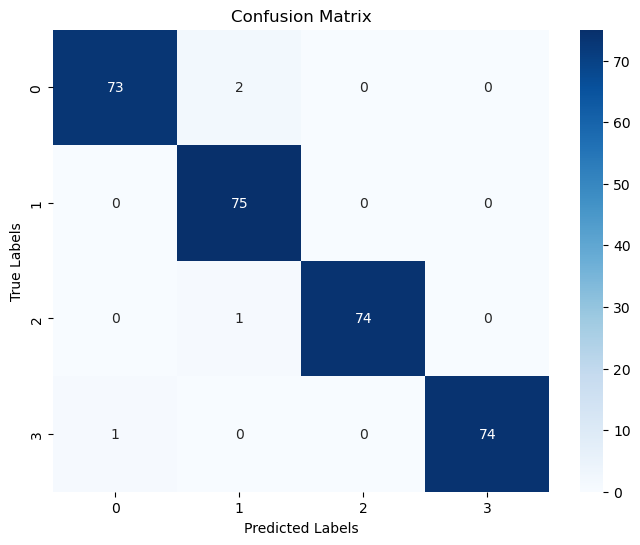


Precision: 0.9870
Recall: 0.9867
Accuracy: 0.9867
F1 Score: 0.9867


In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Get predictions for the entire dataset
predictions = lstm.predict(X)
true_labels = np.argmax(y, axis=1)  # Convert one-hot encoded true labels to integer labels if necessary
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded predicted labels to integer labels if necessary

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the entire dataset
predictions = lstm.predict(X)
true_labels = np.argmax(y, axis=1)  # Convert one-hot encoded true labels to integer labels if necessary
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded predicted labels to integer labels if necessary

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate evaluation metrics
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("\nPrecision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Accuracy: {:.4f}".format(accuracy))
print("F1 Score: {:.4f}".format(f1))


In [52]:
# res = lstm.predict(X_test)

In [53]:
# actions[np.argmax(res[1])]

In [54]:
# actions[np.argmax(y_test[1])]

# 9. Save Weights

In [55]:
# lstm.save('my_model5.keras')

In [56]:
# del model

In [51]:
lstm.load_weights('wnew25kfold.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
# yhat = model.predict(X_test)

In [60]:
# ytrue = np.argmax(y_test, axis=1).tolist()
# yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
# multilabel_confusion_matrix(ytrue, yhat)

In [62]:
# accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [63]:
from scipy import stats

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245), (20,137,220)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [65]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [74]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = lstm.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/s

1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/s

1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/s

1/1 [==============================] - 0s 30ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/s

1/1 [==============================] - 0s 29ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
lunge
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.pyth

1/1 [==============================] - 0s 27ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
lunge
<class 'mediapipe.pyth

1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/s

1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/s

1/1 [==============================] - 0s 32ms/step
pushup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.pyt

1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/s

1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/s

1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/s

1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/s

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionO

1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
lunge
<c

1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
lunge
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
noactions
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/s

In [67]:
def calculate_angle(a,b,c):
    """
    Computes 3D joint angle inferred by 3 keypoints and their relative positions to one another
    
    """
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [68]:
def get_coordinates(landmarks, mp_pose, side, joint):
    """
    Retrieves x and y coordinates of a particular keypoint from the pose estimation model
         
     Args:
         landmarks: processed keypoints from the pose estimation model
         mp_pose: Mediapipe pose estimation model
         side: 'left' or 'right'. Denotes the side of the body of the landmark of interest.
         joint: 'shoulder', 'elbow', 'wrist', 'hip', 'knee', or 'ankle'. Denotes which body joint is associated with the landmark of interest.
    
    """
    coord = getattr(mp_pose.PoseLandmark,side.upper()+"_"+joint.upper())
    x_coord_val = landmarks[coord.value].x
    y_coord_val = landmarks[coord.value].y
    return [x_coord_val, y_coord_val]        

In [69]:
def viz_joint_angle(image, angle, joint):
    """
    Displays the joint angle value near the joint within the image frame
    
    """
    cv2.putText(image, str(int(angle)), 
                   tuple(np.multiply(joint, [640, 480]).astype(int)), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                        )
    return

In [99]:
def count_reps(image, current_action, landmarks, mp_pose):
    """
    Counts repetitions of each exercise. Global count and stage (i.e., state) variables are updated within this function.
    
    """

    global  squat_counter, squat_stage, pushup_counter, pushup_stage, lunge_counter, lunge_stage
        
    if current_action == 'squat':
        # Get coords
        # left side
        left_shoulder = get_coordinates(landmarks, mp_pose, 'left', 'shoulder')
        left_hip = get_coordinates(landmarks, mp_pose, 'left', 'hip')
        left_knee = get_coordinates(landmarks, mp_pose, 'left', 'knee')
        left_ankle = get_coordinates(landmarks, mp_pose, 'left', 'ankle')
        # right side
        right_shoulder = get_coordinates(landmarks, mp_pose, 'right', 'shoulder')
        right_hip = get_coordinates(landmarks, mp_pose, 'right', 'hip')
        right_knee = get_coordinates(landmarks, mp_pose, 'right', 'knee')
        right_ankle = get_coordinates(landmarks, mp_pose, 'right', 'ankle')
        
        # Calculate knee angles
        left_knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        right_knee_angle = calculate_angle(right_hip, right_knee, right_ankle)
        
        # Calculate hip angles
        left_hip_angle = calculate_angle(left_shoulder, left_hip, left_knee)
        right_hip_angle = calculate_angle(right_shoulder, right_hip, right_knee)
        
        # Squat counter logic
        thr = 165
        if (left_knee_angle < thr) and (right_knee_angle < thr) and (left_hip_angle < thr) and (right_hip_angle < thr):
            squat_stage = "down"
        if (left_knee_angle > thr) and (right_knee_angle > thr) and (left_hip_angle > thr) and (right_hip_angle > thr) and (squat_stage =='down'):
            squat_stage='up'
            squat_counter += 1
            
        # Viz joint angles
        viz_joint_angle(image, left_knee_angle, left_knee)
        viz_joint_angle(image, left_hip_angle, left_hip)
   
    
    elif current_action == 'pushup':
        # Get coordinates for the shoulders, elbows, wrists, hips, and knees
        left_shoulder = get_coordinates(landmarks, mp_pose, 'left', 'shoulder')
        left_elbow = get_coordinates(landmarks, mp_pose, 'left', 'elbow')
        left_wrist = get_coordinates(landmarks, mp_pose, 'left', 'wrist')
        left_hip = get_coordinates(landmarks, mp_pose, 'left', 'hip')
        left_knee = get_coordinates(landmarks, mp_pose, 'left', 'knee')

        right_shoulder = get_coordinates(landmarks, mp_pose, 'right', 'shoulder')
        right_elbow = get_coordinates(landmarks, mp_pose, 'right', 'elbow')
        right_wrist = get_coordinates(landmarks, mp_pose, 'right', 'wrist')
        right_hip = get_coordinates(landmarks, mp_pose, 'right', 'hip')
        right_knee = get_coordinates(landmarks, mp_pose, 'right', 'knee')

        # Calculate elbow angles
        left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
        right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)

        # Body alignment angles for sagging or piking hips
        left_body_angle = calculate_angle(left_shoulder, left_hip, left_knee)
        right_body_angle = calculate_angle(right_shoulder, right_hip, right_knee)

        # Detect mistakes
        feedback = []

        # Mistake 1: Elbows flaring out too much
        if left_elbow_angle > 45 or right_elbow_angle > 45:  # Adjust threshold as needed
            feedback.append("Elbows closer to body")

        # Mistake 2: Sagging Hips
        if left_body_angle < 160 or right_body_angle < 160:  # Adjust thresholds as needed
            feedback.append("Tighten core, no sagging hips")

        # Mistake 3: Piking Hips
        if left_body_angle > 200 or right_body_angle > 200:  # Adjust thresholds as needed
            feedback.append("Lower hips to straight line")

        # Mistake 4: Not going low enough
        # This requires a method to measure how low the chest goes, which might be more complex in a 2D video.
        # As a placeholder, you could use the elbow angle as a proxy, but this would not be very accurate.
        if left_elbow_angle > 90 or right_elbow_angle > 90:  # Adjust threshold as needed
            feedback.append("Go lower, chest near ground")

        # Combine feedback into a single string
        combined_feedback = ', '.join(feedback)

        # Display feedback on the image
        cv2.putText(image, combined_feedback, (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)

        # Pushup counter logic
        thr = 160  # Threshold for considering an elbow fully extended
        if (left_elbow_angle > thr) and (right_elbow_angle > thr) and pushup_stage != "down":
            pushup_stage = "down"
        elif (left_elbow_angle < thr) and (right_elbow_angle < thr) and pushup_stage == "down":
            pushup_stage = "up"
            pushup_counter += 1

        # Optional: Visualize joint angles for debugging or further analysis
        viz_joint_angle(image, left_elbow_angle, left_elbow)
        viz_joint_angle(image, right_elbow_angle, right_elbow)

    
#     elif current_action == 'pushup':
#         # Get coords
#         # left side
#         left_shoulder = get_coordinates(landmarks, mp_pose, 'left', 'shoulder')
#         left_elbow = get_coordinates(landmarks, mp_pose, 'left', 'elbow')
#         left_wrist = get_coordinates(landmarks, mp_pose, 'left', 'wrist')
#         # right side
#         right_shoulder = get_coordinates(landmarks, mp_pose, 'right', 'shoulder')
#         right_elbow = get_coordinates(landmarks, mp_pose, 'right', 'elbow')
#         right_wrist = get_coordinates(landmarks, mp_pose, 'right', 'wrist')
        
#         # Calculate elbow angles
#         left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
#         right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
        
#         # Push-up counter logic
#         thr = 160
#         if (left_elbow_angle > thr) and (right_elbow_angle > thr):
#             pushup_stage = "down"
#         if (left_elbow_angle < thr) and (right_elbow_angle < thr) and (pushup_stage == "down"):
#             pushup_stage = "up"
#             pushup_counter += 1
            
#         # Viz joint angles
#         viz_joint_angle(image, left_elbow_angle, left_elbow)
#         viz_joint_angle(image, right_elbow_angle, right_elbow)
                
    elif current_action == 'lunge':
        # Assuming you are tracking the front leg for lunges
        # Get coords for the front leg (choose left or right based on your setup)
        front_shoulder = get_coordinates(landmarks, mp_pose, 'left', 'shoulder')
        front_hip = get_coordinates(landmarks, mp_pose, 'left', 'hip')
        front_knee = get_coordinates(landmarks, mp_pose, 'left', 'knee')
        front_ankle = get_coordinates(landmarks, mp_pose, 'left', 'ankle')

        # Get coords for the back leg (choose left or right based on your setup)
        back_hip = get_coordinates(landmarks, mp_pose, 'right', 'hip')
        back_knee = get_coordinates(landmarks, mp_pose, 'right', 'knee')
        back_ankle = get_coordinates(landmarks, mp_pose, 'right', 'ankle')

        # Calculate knee angles
        front_knee_angle = calculate_angle(front_hip, front_knee, front_ankle)
        back_knee_angle = calculate_angle(back_hip, back_knee, back_ankle)

        # Lunge counter logic
        # Define your threshold angle for detecting a lunge
        thr = 140  # This is an example threshold; you may need to adjust this based on your observations
        if front_knee_angle < thr and back_knee_angle > thr:  # This is a simplification; adjust as needed
            lunge_stage = "down"
        if front_knee_angle > thr and lunge_stage == "down":
            lunge_stage = "up"
            lunge_counter += 1

        # Viz joint angles for the front leg
        viz_joint_angle(image, front_knee_angle, front_knee)

    else:
        pass

In [101]:
def prob_viz(res, actions, input_frame, colors):
    """
    This function displays the model prediction probability distribution over the set of exercise classes
    as a horizontal bar graph
    
    """
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):        
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [102]:
# 1. New detection variables
sequence = []
predictions = []
res = []
threshold = 0.5 # minimum confidence to classify as an action/exercise
current_action = ''
model_name = 'LSTM'

# Rep counter logic variables
squat_counter = 0
squat_stage = None
pushup_counter = 0
pushup_stage = None
lunge_counter = 0
lunge_stage = None

# Camera object
cap = cv2.VideoCapture(0)
print('hello')


# Video writer object that saves a video of the real time test
fourcc = cv2.VideoWriter_fourcc('M','J','P','G') # video compression format
HEIGHT = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # webcam video frame height
WIDTH = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # webcam video frame width
FPS = int(cap.get(cv2.CAP_PROP_FPS)) # webcam video fram rate 

video_name = os.path.join(os.getcwd(),f"{model_name}_real_time_test1.avi")
out = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*"MJPG"), FPS, (WIDTH,HEIGHT))

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detection
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        sequence_length = 30

        # 2. Prediction logic
        keypoints = extract_keypoints(results)        
        sequence.append(keypoints)      
        sequence = sequence[-sequence_length:]


        if len(sequence) == sequence_length:
            res = lstm.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]           
            predictions.append(np.argmax(res))
            current_action = actions[np.argmax(res)]
            confidence = np.max(res)
            
        #3. Viz logic
            # Erase current action variable if no probability is above threshold
            if confidence < threshold:
                current_action = ''

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
            # Count reps
            try:
                landmarks = results.pose_landmarks.landmark
                count_reps(
                    image, current_action, landmarks, mp_holistic)
            except Exception as e:
                print(f"An error occured:  {e}")
                pass

            # Display graphical information
            cv2.rectangle(image, (0,0), (640, 40), colors[np.argmax(res)], -1)
            cv2.putText(image, 'squat ' + str(squat_counter), (490,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, 'pushup ' + str(pushup_counter), (330,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, 'lunge ' + str(lunge_counter), (200,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
         
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        
        # Write to video file
        if ret == True:
            out.write(image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    out.release()
    cv2.destroyAllWindows()

hello
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  

An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneT

An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneT

An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneT

An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneType' object has no attribute 'landmark'
An error occured:  'NoneT

In [73]:
#     cap.release()
#     out.release()
#     cv2.destroyAllWindows()